In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #visualization library
from statsmodels.graphics.tsaplots import plot_acf #Auto-Correlation Plots
from statsmodels.graphics.tsaplots import plot_pacf #Partial-Auto Correlation Plots

In [6]:
export_df = pd.read_csv(r'C:\Users\acer pc\Desktop\ML\2018-2010_export.csv')
import_df = pd.read_csv(r'C:\Users\acer pc\Desktop\ML\2018-2010_import.csv')

In [7]:
import_df.head()


,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [8]:
import_df.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [9]:
import_df =import_df.dropna()
import_df = import_df.reset_index(drop=True)

In [10]:
export_df.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [11]:
export_df = export_df.dropna()
export_df = export_df.reset_index(drop=True)

In [12]:
importing_countries=import_df[['country']].nunique()
exporting_countries=export_df[['country']].nunique()
print("India imports from:",importing_countries,"countries")
print("India exports to:",exporting_countries,"countries")

India imports from: country    241
dtype: int64 countries
India exports to: country    248
dtype: int64 countries


In [13]:
import_group=import_df.groupby(['country','year']).agg({'value':'sum'})
export_group=export_df.groupby(['country','year']).agg({'value':'sum'})

In [14]:
export_group.groupby(['country'])
import_temp=import_group.groupby(['country']).agg({'value':'sum'})
export_temp=export_group.groupby(['country']).agg({'value':'sum'}).loc[import_temp.index.values]

In [15]:
data_1=import_group.groupby(['country']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2=export_temp
data_3=data_2-data_1

In [16]:
data_1.columns=['Import']
data_2.columns=['Export']
data_3.columns=['Loss / Profit']

In [17]:
df=pd.DataFrame(index=data_1.index.values)
#df=pd.concat([data_1,data_2,data_3])
df['Import']=data_1
df['Export']=data_2
df['Loss / Profit']=data_3

In [18]:
df


,Import,Export,Loss / Profit
AUSTRALIA,142723.67,25372.29,-117351.38
GERMANY,148120.79,68855.45,-79265.34
KOREA RP,154263.94,38023.02,-116240.92
INDONESIA,160452.65,42148.84,-118303.81
IRAQ,182464.57,9833.61,-172630.96
SWITZERLAND,243739.33,9992.56,-233746.77
U S A,281436.58,360609.57,79172.99
SAUDI ARAB,292104.09,65995.99,-226108.10
U ARAB EMTS,307810.15,289374.88,-18435.27
CHINA P RP,678877.15,121806.00,-557071.15


Text(0,0.5,'Value of transactions (in million US$)')

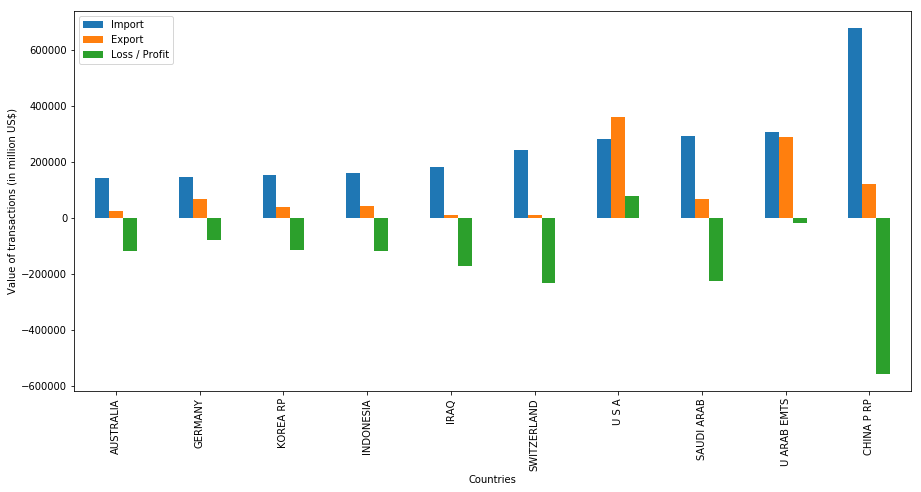

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='bar',ax=ax)
ax.set_xlabel('Countries')
ax.set_ylabel('Value of transactions (in million US$)')

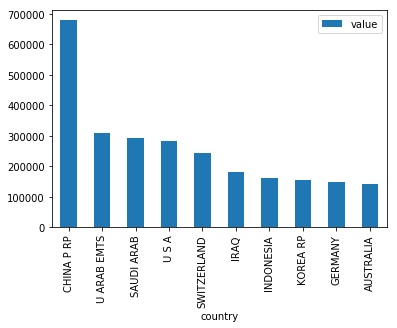

In [20]:
df_import = import_df.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending = False).head(10)
df_import.plot(kind='bar')

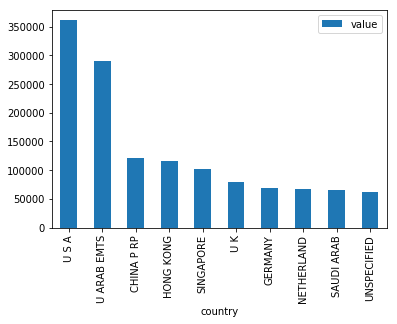

In [21]:
df_export = export_df.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending = False).head(10)


df_export.plot(kind='bar')

In [22]:
HSCode=pd.DataFrame()
HSCode['Start']=[1,6,15,16,25,28,39,41,44,47,50,64,68,71,72,84,86,90,93,94,97]
HSCode['End']=[5,14,15,24,27,38,40,43,46,49,63,67,70,71,83,85,89,92,93,96,98]
HSCode['Sections']=['Animals & Animal Products',
'Vegetable Products',
'Animal Or Vegetable Fats',
'Prepared Foodstuffs',
'Mineral Products',
'Chemical Products',
'Plastics & Rubber',
'Hides & Skins',
'Wood & Wood Products',
'Wood Pulp Products',
'Textiles & Textile Articles',
'Footwear, Headgear',
'Articles Of Stone, Plaster, Cement, Asbestos',
'Pearls, Precious Or Semi-Precious Stones, Metals',
'Base Metals & Articles Thereof',
'Machinery & Mechanical Appliances',
'Transportation Equipment',
'Instruments - Measuring, Musical',
'Arms & Ammunition',
'Miscellaneous',
'Works Of Art',]

In [23]:
HSCode

,Start,End,Sections
0,1,5,Animals & Animal Products
1,6,14,Vegetable Products
2,15,15,Animal Or Vegetable Fats
3,16,24,Prepared Foodstuffs
4,25,27,Mineral Products
5,28,38,Chemical Products
6,39,40,Plastics & Rubber
7,41,43,Hides & Skins
8,44,46,Wood & Wood Products
9,47,49,Wood Pulp Products


In [24]:
import_df['Sections']=import_df["HSCode"]
export_df['Sections']=export_df["HSCode"]
for i in range(0,len(HSCode)):
    import_df.loc[(import_df["Sections"] >= HSCode['Start'][i]) & (import_df["Sections"] <= HSCode['End'][i]),"Sections"]=i
    export_df.loc[(export_df["Sections"] >= HSCode['Start'][i]) & (export_df["Sections"] <= HSCode['End'][i]),"Sections"]=i
    

In [25]:
import_group=import_df.groupby(['Sections','year']).agg({'value':'sum'})
export_group=export_df.groupby(['Sections','year']).agg({'value':'sum'})

In [26]:
import_temp=import_group.groupby(['Sections']).agg({'value':'sum'})
export_temp=export_group.groupby(['Sections']).agg({'value':'sum'}).loc[import_temp.index.values]

In [27]:
data_1=import_group.groupby(['Sections']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2=export_temp
data_3=data_2-data_1
data_1.columns=['Import']
data_2.columns=['Export']
data_3.columns=['Loss / Profit']
df=pd.DataFrame(index=data_1.index.values)
#df=pd.concat([data_1,data_2,data_3])
df['Import']=data_1
df['Export']=data_2
df['Loss / Profit']=data_3


In [28]:
HSCode['Sections'][data_1.index.values]

1                                   Vegetable Products
17                    Instruments - Measuring, Musical
2                             Animal Or Vegetable Fats
6                                    Plastics & Rubber
16                            Transportation Equipment
14                      Base Metals & Articles Thereof
5                                    Chemical Products
13    Pearls, Precious Or Semi-Precious Stones, Metals
15                   Machinery & Mechanical Appliances
4                                     Mineral Products
Name: Sections, dtype: object

Text(0,0.5,'Value of transactions (in million US$)')

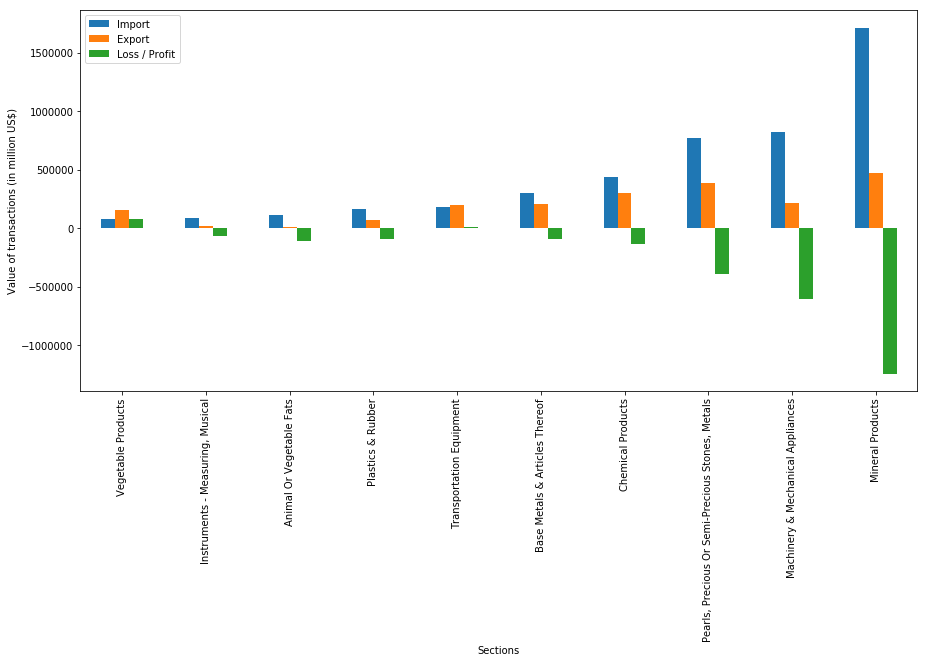

In [29]:
df.index=HSCode['Sections'][data_1.index.values]
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='bar',ax=ax)
ax.set_xlabel('Sections')
ax.set_ylabel('Value of transactions (in million US$)')

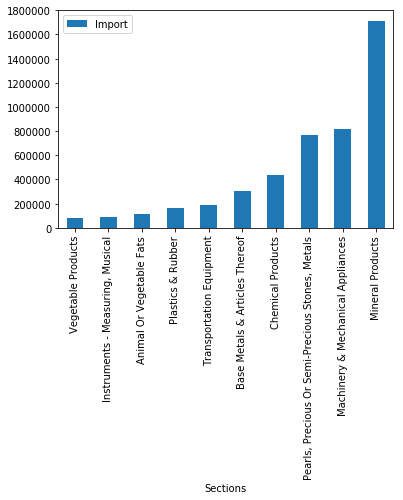

In [30]:
data_1.index=HSCode['Sections'][data_1.index.values]
data_1.plot(kind='bar')

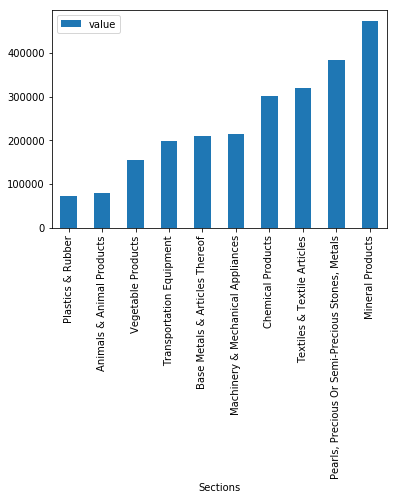

In [31]:
data_2=export_group.groupby(['Sections']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2.index=HSCode['Sections'][data_2.index.values]
data_2.plot(kind='bar')

In [32]:
Import_ =import_df.groupby(['year']).agg({'value':'sum'})
Export_ =export_df.groupby(['year']).agg({'value':'sum'})
Deficit_=Export_ -Import_
Time_Series=pd.DataFrame(index=Import_.index.values)
Time_Series['Import']=Import_
Time_Series['Export']=Export_
Time_Series['Loss / Profit']=Deficit_

In [33]:
Time_Series

,Import,Export,Loss / Profit
2010,369762.25,249801.18,-119961.07
2011,489311.81,305948.28,-183363.53
2012,490730.07,300384.32,-190345.75
2013,450192.99,314388.61,-135804.38
2014,448026.63,310321.02,-137705.61
2015,412537.53,262274.30,-150263.23
2016,384350.29,275835.27,-108515.02
2017,931148.04,303507.85,-627640.19
2018,1028142.66,330058.64,-698084.02


Text(0,0.5,'Value of transactions (in million US$)')

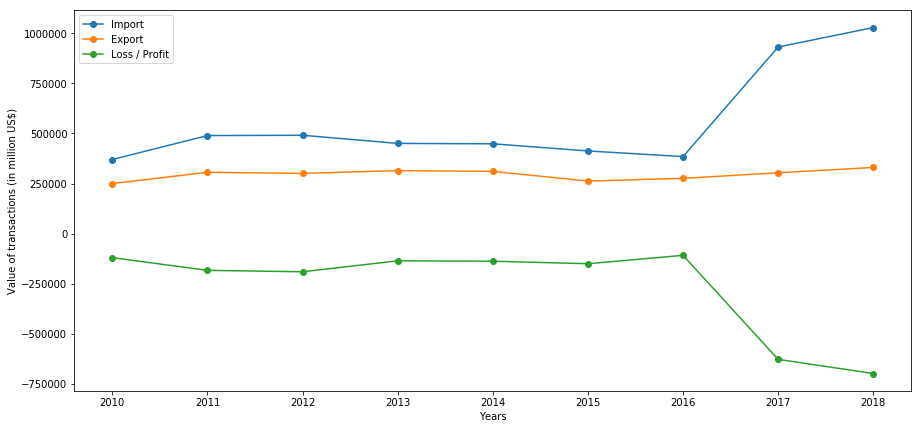

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
Time_Series.plot(ax=ax,marker='o')
ax.set_xlabel('Years')
ax.set_ylabel('Value of transactions (in million US$)')